# 0. Libraries

In [1]:
import pandas as pd
import pyarrow
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('default')

# 1. Data Loading

In [2]:
df_pizza_types = pd.read_csv('data/pizza_types.csv')
df_pizza_types.shape

(32, 4)

In [3]:
df_pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [4]:
df_pizzas = pd.read_csv('data/pizzas.csv')
df_pizzas.shape

(96, 4)

In [5]:
df_pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [6]:
df_order_details = pd.read_parquet('data/order_details.parquet', engine = 'pyarrow')
df_order_details.shape

(48620, 4)

In [7]:
df_order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [8]:
df_orders = pd.read_parquet('data/orders.parquet', engine = 'pyarrow')
df_orders.shape

(21350, 7)

In [9]:
df_orders.head()

,order_id,date,time,week_start,month_start,wday,hour
0,1,2015-01-01,11:38:36,2014-12-29,2015-01-01,3,11.633333
1,2,2015-01-01,11:57:40,2014-12-29,2015-01-01,3,11.950000
2,3,2015-01-01,12:12:28,2014-12-29,2015-01-01,3,12.200000
3,4,2015-01-01,12:16:31,2014-12-29,2015-01-01,3,12.266667
4,5,2015-01-01,12:21:30,2014-12-29,2015-01-01,3,12.350000


# 2. Menu exploration

In [10]:
print("There are", df_pizza_types.shape[0], "types of pizza.")
print("There are", df_pizzas.shape[0], "combinations of pizza types and sizes.")

There are 32 types of pizza.
There are 96 combinations of pizza types and sizes.


## 2.1. What are the different pizza types?

In [52]:
df_pizza_types['pizza_type_id'].values

array(['bbq_ckn', 'cali_ckn', 'ckn_alfredo', 'ckn_pesto', 'southw_ckn',
       'thai_ckn', 'big_meat', 'classic_dlx', 'hawaiian', 'ital_cpcllo',
       'napolitana', 'pep_msh_pep', 'pepperoni', 'the_greek',
       'brie_carre', 'calabrese', 'ital_supr', 'peppr_salami',
       'prsc_argla', 'sicilian', 'soppressata', 'spicy_ital',
       'spinach_supr', 'five_cheese', 'four_cheese', 'green_garden',
       'ital_veggie', 'mediterraneo', 'mexicana', 'spin_pesto',
       'spinach_fet', 'veggie_veg'], dtype=object)

## 2.2. Are there 3 size options for each type of pizza?

In [12]:
df_pizzas.groupby('pizza_type_id').agg({'size' : 'count'}).query('size != 3')

,size
pizza_type_id,
brie_carre,1
the_greek,5


In [13]:
df_pizzas.query('pizza_type_id.isin(["brie_carre","the_greek"])')

,pizza_id,pizza_type_id,size,price
39,the_greek_s,the_greek,S,12.00
40,the_greek_m,the_greek,M,16.00
41,the_greek_l,the_greek,L,20.50
42,the_greek_xl,the_greek,XL,25.50
43,the_greek_xxl,the_greek,XXL,35.95
44,brie_carre_s,brie_carre,S,23.65


"brie_carre" only has S size as an option and "the_greek" has 5 different sizes (S, M, L, XL & XXL).

The other pizza types have 3 size options (S, M & L).

## 2.3. Categories

In [14]:
df_pizza_types.category.value_counts()

category
Supreme    9
Veggie     9
Classic    8
Chicken    6
Name: count, dtype: int64

There are only 4 pizza categories: supreme, veggie, classic and chicken.

## 2.4. Ingredients

In [15]:
df_pizza_types_full = pd.concat([df_pizza_types, df_pizza_types['ingredients'].str.get_dummies(sep = ", ")], axis = 1)
df_pizza_types_full.head()

,pizza_type_id,name,category,ingredients,Alfredo Sauce,Anchovies,Artichoke,Artichokes,Arugula,Asiago Cheese,...,Sliced Ham,Smoked Gouda Cheese,Soppressata Salami,Spinach,Sun-dried Tomatoes,Thai Sweet Chilli Sauce,Thyme,Tomatoes,Zucchini,‘Nduja Salami
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli...",0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


A total of 65 ingredients are being used to make pizzas.

In [16]:
df_pizza_types_full.iloc[:,4:].sum().reset_index()\
    .rename({'index' : 'ingredient', 0 : 'frequency'}, axis = 1).sort_values('frequency', ascending = False).head(10)

,ingredient,frequency
25,Garlic,20
62,Tomatoes,18
51,Red Onions,13
52,Red Peppers,10
58,Spinach,8
37,Mushrooms,7
36,Mozzarella Cheese,6
44,Pepperoni,6
3,Artichokes,5
15,Chicken,5


The most common ingredients in pizza are garlic and tomatoes, followed by red onions and red peppers.

## 2.5. Prices

In [17]:
df_pizzas.price.describe()

count    96.000000
mean     16.440625
std       4.090266
min       9.750000
25%      12.500000
50%      16.250000
75%      20.250000
max      35.950000
Name: price, dtype: float64

In [18]:
df_pizzas.sort_values('price', ascending = False)

,pizza_id,pizza_type_id,size,price
43,the_greek_xxl,the_greek,XXL,35.95
42,the_greek_xl,the_greek,XL,25.50
44,brie_carre_s,brie_carre,S,23.65
80,ital_veggie_l,ital_veggie,L,21.00
50,ital_supr_l,ital_supr,L,20.75
...,...,...,...,...
81,mediterraneo_s,mediterraneo,S,12.00
72,four_cheese_s,four_cheese,S,11.75
33,pep_msh_pep_s,pep_msh_pep,S,11.00
24,hawaiian_s,hawaiian,S,10.50


The average pizza price is 16.44 €. The most expensive pizza ("the_greek_xxl") costs 35.95 € and the cheaper one ("pepperoni_s") is 9.75 €.

# 3. Pizza orders exploration

In [19]:
print("There were", df_orders.shape[0], "different clients in 2015.")
print("There were", df_order_details.shape[0], "total orders in 2015.")

There were 21350 different clients in 2015.
There were 48620 total orders in 2015.


In [20]:
df_orders.head()

,order_id,date,time,week_start,month_start,wday,hour
0,1,2015-01-01,11:38:36,2014-12-29,2015-01-01,3,11.633333
1,2,2015-01-01,11:57:40,2014-12-29,2015-01-01,3,11.950000
2,3,2015-01-01,12:12:28,2014-12-29,2015-01-01,3,12.200000
3,4,2015-01-01,12:16:31,2014-12-29,2015-01-01,3,12.266667
4,5,2015-01-01,12:21:30,2014-12-29,2015-01-01,3,12.350000


In [21]:
df_order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


## 3.1. Which are the most liked pizzas?

In [24]:
top10_pizza_types = df_order_details.merge(df_pizzas, how = 'left', on = 'pizza_id').groupby('pizza_type_id')\
    .agg({'quantity' : 'sum'}).sort_values('quantity', ascending = False).head(10)
top10_pizza_types

,quantity
pizza_type_id,
classic_dlx,2453
bbq_ckn,2432
hawaiian,2422
pepperoni,2418
thai_ckn,2371
cali_ckn,2370
sicilian,1938
spicy_ital,1924
southw_ckn,1917


The most ordered pizza types are classic_dlx (2453), bbq_ckn (2432), hawaiian (2422), pepperoni (2418), thai_ckn (2371) and cali_ckn (2370).

## 3.2. And the least liked?

In [25]:
bottom10_pizza_types = df_order_details.merge(df_pizzas, how = 'left', on = 'pizza_id').groupby('pizza_type_id')\
    .agg({'quantity' : 'sum'}).sort_values('quantity').head(10)
bottom10_pizza_types

,quantity
pizza_type_id,
brie_carre,490
mediterraneo,934
calabrese,937
spinach_supr,950
soppressata,961
spin_pesto,970
ckn_pesto,973
ital_veggie,981
ckn_alfredo,987


On the other hand, the least ordered pizza type is brie_carre, with only 490 orders.

## 3.3. Popularity of top 4 pizzas during the year

In [26]:
top4_pizza_types = top10_pizza_types[0:4].index
top4_pizza_types

Index(['classic_dlx', 'bbq_ckn', 'hawaiian', 'pepperoni'], dtype='object', name='pizza_type_id')

In [27]:
df_orders_pizza_type = df_order_details[['order_id', 'pizza_id', 'quantity']]\
    .merge(df_orders[['order_id', 'date', 'week_start', 'month_start', 'wday']], on = 'order_id', how = 'left')\
        .merge(df_pizzas[['pizza_id', 'pizza_type_id']], on = 'pizza_id', how = 'left')
df_orders_pizza_type.head()

,order_id,pizza_id,quantity,date,week_start,month_start,wday,pizza_type_id
0,1,hawaiian_m,1,2015-01-01,2014-12-29,2015-01-01,3,hawaiian
1,2,classic_dlx_m,1,2015-01-01,2014-12-29,2015-01-01,3,classic_dlx
2,2,five_cheese_l,1,2015-01-01,2014-12-29,2015-01-01,3,five_cheese
3,2,ital_supr_l,1,2015-01-01,2014-12-29,2015-01-01,3,ital_supr
4,2,mexicana_m,1,2015-01-01,2014-12-29,2015-01-01,3,mexicana


In [28]:
df_orders_popular_pizza = df_orders_pizza_type.loc[df_orders_pizza_type['pizza_type_id'].isin(top4_pizza_types),]
df_orders_popular_pizza

,order_id,pizza_id,quantity,date,week_start,month_start,wday,pizza_type_id
0,1,hawaiian_m,1,2015-01-01,2014-12-29,2015-01-01,3,hawaiian
1,2,classic_dlx_m,1,2015-01-01,2014-12-29,2015-01-01,3,classic_dlx
10,6,bbq_ckn_s,1,2015-01-01,2014-12-29,2015-01-01,3,bbq_ckn
14,9,classic_dlx_s,1,2015-01-01,2014-12-29,2015-01-01,3,classic_dlx
25,11,bbq_ckn_l,1,2015-01-01,2014-12-29,2015-01-01,3,bbq_ckn
...,...,...,...,...,...,...,...,...
48600,21343,pepperoni_l,1,2015-12-31,2015-12-28,2015-12-01,3,pepperoni
48604,21344,pepperoni_m,1,2015-12-31,2015-12-28,2015-12-01,3,pepperoni
48605,21345,classic_dlx_s,1,2015-12-31,2015-12-28,2015-12-01,3,classic_dlx
48611,21347,bbq_ckn_m,1,2015-12-31,2015-12-28,2015-12-01,3,bbq_ckn


### 3.3.1. Montly popularity comparison

In [29]:
df_popular_pizza_monthy_orders = df_orders_popular_pizza.groupby(['month_start', 'pizza_type_id']).agg({'quantity' : 'sum'}).reset_index()
df_popular_pizza_monthy_orders.head()

,month_start,pizza_type_id,quantity
0,2015-01-01,bbq_ckn,211
1,2015-01-01,classic_dlx,190
2,2015-01-01,hawaiian,185
3,2015-01-01,pepperoni,239
4,2015-02-01,bbq_ckn,193


In [30]:
df_popular_pizza_monthy_orders_pivot = df_popular_pizza_monthy_orders.pivot(index = 'month_start', columns = 'pizza_type_id', values = 'quantity')
df_popular_pizza_monthy_orders_pivot.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_popular_pizza_monthy_orders_pivot.head()

pizza_type_id,bbq_ckn,classic_dlx,hawaiian,pepperoni
Jan,211,190,185,239
Feb,193,173,198,205
Mar,231,204,217,187
Apr,214,216,219,171
May,226,218,198,241


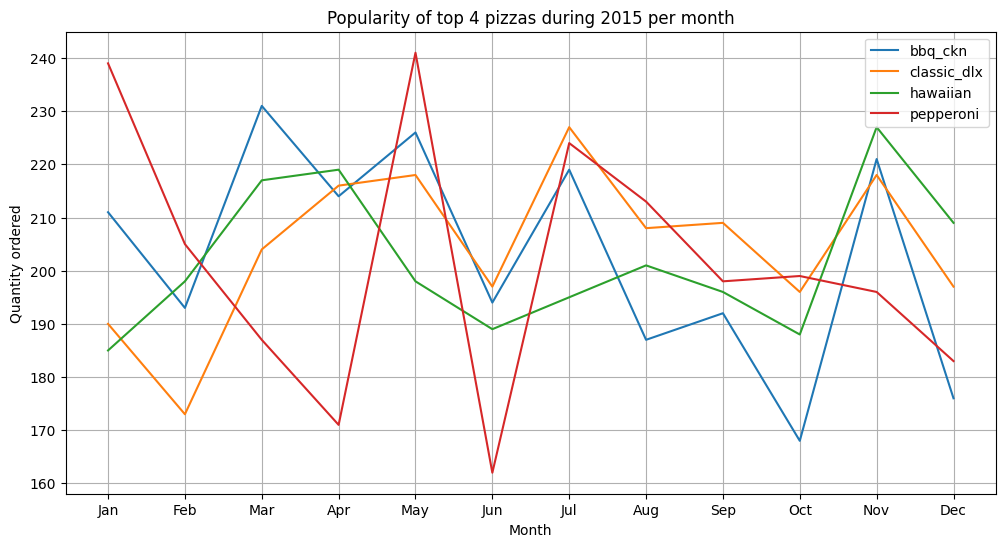

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df_popular_pizza_monthy_orders_pivot.index, df_popular_pizza_monthy_orders_pivot)
plt.title('Popularity of top 4 pizzas during 2015 per month')
plt.xlabel('Month')
plt.legend(labels = df_popular_pizza_monthy_orders_pivot.columns)
plt.grid(True)
plt.ylabel('Quantity ordered')
plt.show()

For bbq_ckn, the best months were March, May, July, April and November.

For classic_dlx, more orders were made during July, May, April and November.

Bbq_ckn follows a trend very similar to classic_dlx. Bbq_ckn was more popular during the first half of the year, while classic_dlx was more popular at the second half.

The hawaiian, on the other hand, was not that popular during summer. The best months for this pizza were November, April and March.

The pepperoni pizza was the one with more ups and downs. During some months like January and May it was the most popular option chosen by the clients, while in June and April it was the least popular of the 4.

The hawaiian and pepperoni pizzas follow very different trends compared to the first two pizzas.

# 4. Income exploration

In [32]:
# Adding the total_price of each order_detail in df_order_details.
df_order_details['total_price'] = df_order_details.merge(df_pizzas, how = 'left', on = 'pizza_id')['price'] * df_order_details['quantity']

In [33]:
df_order_details.head()

,order_details_id,order_id,pizza_id,quantity,total_price
0,1,1,hawaiian_m,1,13.25
1,2,2,classic_dlx_m,1,16.00
2,3,2,five_cheese_l,1,18.50
3,4,2,ital_supr_l,1,20.75
4,5,2,mexicana_m,1,16.00


In [34]:
# Adding the total_price of each order in df_orders.
df_orders = df_orders.merge(df_order_details.groupby('order_id').agg({'total_price' : 'sum', 'quantity' : 'sum'})\
                            .reset_index(), on = 'order_id', how = 'left')

In [35]:
df_orders.head()

,order_id,date,time,week_start,month_start,wday,hour,total_price,quantity
0,1,2015-01-01,11:38:36,2014-12-29,2015-01-01,3,11.633333,13.25,1
1,2,2015-01-01,11:57:40,2014-12-29,2015-01-01,3,11.950000,92.00,5
2,3,2015-01-01,12:12:28,2014-12-29,2015-01-01,3,12.200000,37.25,2
3,4,2015-01-01,12:16:31,2014-12-29,2015-01-01,3,12.266667,16.50,1
4,5,2015-01-01,12:21:30,2014-12-29,2015-01-01,3,12.350000,16.50,1


## 4.1. Monthly income

In [36]:
df_orders_monthly = df_orders.groupby('month_start').agg({'total_price' : 'sum', 'quantity' : 'sum'})
df_orders_monthly.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

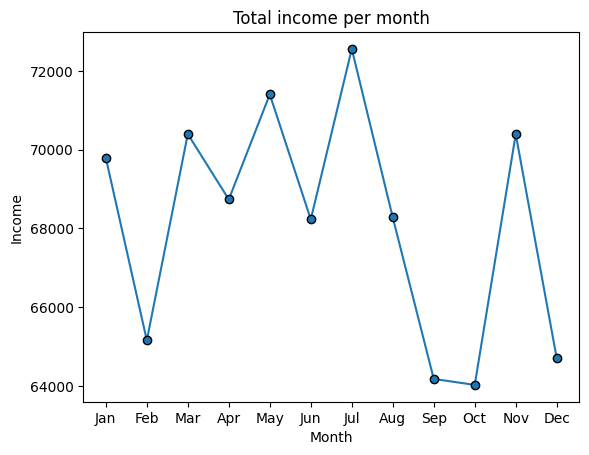

In [37]:
plt.plot(df_orders_monthly.index, df_orders_monthly['total_price'], marker = 'o', markeredgecolor='black', markersize = 6)
plt.title('Total income per month')
plt.xlabel('Month')
plt.ylabel('Income')
plt.show()

In [228]:
df_orders_monthly

,total_price,quantity
Jan,69793.30,4232
Feb,65159.60,3961
Mar,70397.10,4261
Apr,68736.80,4151
May,71402.75,4328
Jun,68230.20,4107
Jul,72557.90,4392
Aug,68278.25,4168
Sep,64180.05,3890
Oct,64027.60,3883


July and May were the best months for the restaurant.

October, September, December and February were the months with less income generated.

It is noticeable that the best part of the year in terms of income was from January to August. While from September until December the sales dropped a good amount, with February and November being the exceptions.

What makes these two months different from the rest?

Why does the restaurant generate less income in the latter part of the year?

What makes July the best month of the year?

## 4.2. Weekly income

In [38]:
df_orders_weekly = df_orders.groupby('week_start').agg({'total_price' : 'sum', 'quantity' : 'sum'})

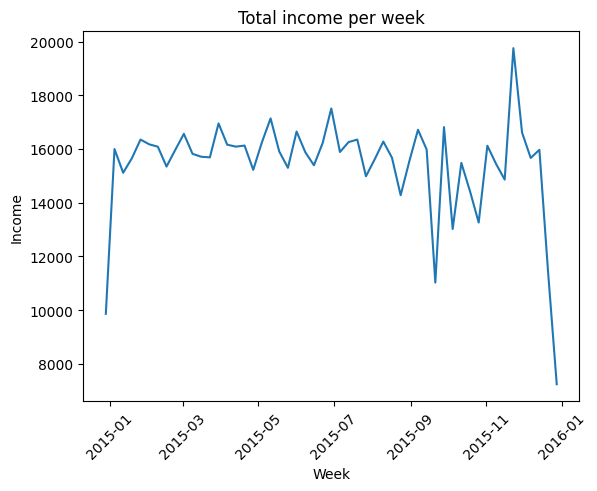

In [39]:
plt.plot(df_orders_weekly.index, df_orders_weekly['total_price'])
plt.title('Total income per week')
plt.xlabel('Week')
plt.xticks(rotation=45)
plt.ylabel('Income')
plt.show()

The first and the last week in the data are probably incomplete.

In [40]:
df_orders_weekly.sort_values('total_price', ascending = False).head(10)

,total_price,quantity
week_start,,
2015-11-23,19753.90,1186
2015-06-29,17509.50,1066
2015-05-11,17139.70,1046
2015-03-30,16951.65,1025
2015-09-28,16815.55,1008
2015-09-07,16717.00,1009
2015-06-01,16650.20,997
2015-11-30,16613.80,1013
2015-03-02,16564.45,996


The week with the most sales was the last one of November. Why is that?

In [41]:
df_orders_weekly.sort_values('total_price').head(10)

,total_price,quantity
week_start,,
2015-12-28,7244.25,442
2014-12-29,9863.60,591
2015-09-21,11026.40,674
2015-12-21,11427.85,693
2015-10-05,13023.20,794
2015-10-26,13262.45,810
2015-08-24,14279.80,866
2015-10-19,14425.75,876
2015-11-16,14860.55,908


The weeks with less sales in 2015 (excluding the last and the first in the data) were at the end of September and December.

What happened during these two weeks?

## 4.3. Day of the week income

In [42]:
df_orders_weekday = df_orders.groupby('wday').agg({'total_price' : 'sum', 'quantity' : 'sum'})
df_orders_weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

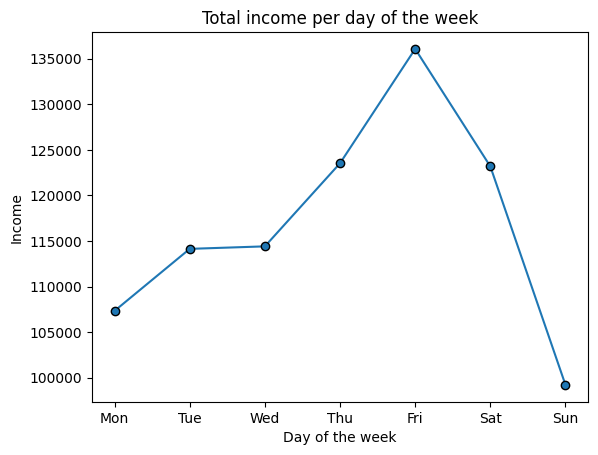

In [43]:
plt.plot(df_orders_weekday.index, df_orders_weekday['total_price'], marker = 'o', markeredgecolor='black', markersize = 6)
plt.title('Total income per day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Income')
plt.show()

In [44]:
df_orders_weekday

,total_price,quantity
Mon,107329.55,6485
Tue,114133.80,6895
Wed,114408.40,6946
Thu,123528.50,7478
Fri,136073.90,8242
Sat,123182.40,7493
Sun,99203.50,6035


Friday (136073.90 €) is the day of the week when more income was generated, followed by Thursday (123528.50 €) and Saturday (123182.40 €).

Sunday was the weekday with less income generated (99203.50 €).

## 4.4. Hour of the day income

In [45]:
df_orders['hour_trunc'] = df_orders['hour'].apply(lambda x: str(x).split('.')[0])

In [46]:
df_orders_hourly = df_orders.groupby('hour_trunc').agg({'total_price' : 'sum', 'quantity' : 'sum'})
# As an object, the index has the following order 10, 11 ... 21, 22, 23 ... 9
df_orders_hourly.index = df_orders_hourly.index.astype('int64') # cast as integer
df_orders_hourly.sort_index(inplace = True) # order by hour

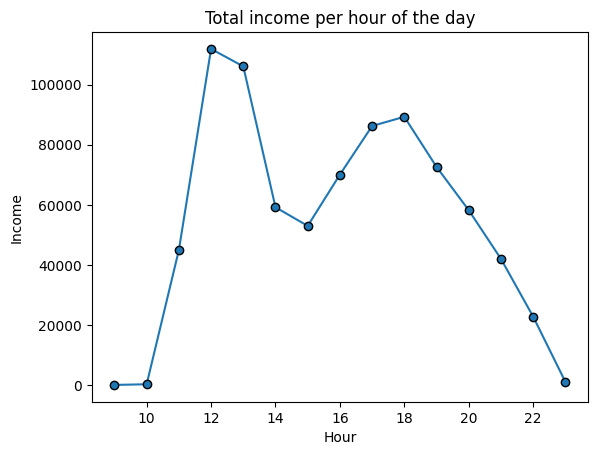

In [47]:
plt.plot(df_orders_hourly.index, df_orders_hourly['total_price'], marker = 'o', markersize = 6, markeredgecolor='black')
plt.title('Total income per hour of the day')
plt.xlabel('Hour')
plt.ylabel('Income')
plt.show()

The lunch period started usually at 11 h and peaks from 12 h to 14 h. It was the period of the day with more clients.

During the afternoon the restaurant remained open and had less clients while generating decent income.

In the evening, the clients orders' were more spread across time, having their peak around 17 h and 19 h.

The number of clients started dropping after 19 h every hour until 23 h.

## 4.5. Total income

In [55]:
df_orders['total_price'].sum().round(2)

817860.05

In 2015, 817860.05 € was generated by the restaurant.

# 5. Ingredients popularity exploration

In [48]:
df_ingredients_ordered = df_order_details[['pizza_id', 'quantity']]\
    .merge(df_pizzas[['pizza_id', 'pizza_type_id']], on = 'pizza_id', how = 'left')\
    .merge(df_pizza_types_full.drop(['ingredients', 'name', 'category'], axis = 1), on = 'pizza_type_id', how = 'left')\
    .drop(['pizza_id', 'pizza_type_id'], axis = 1)
df_ingredients_ordered.head()

,quantity,Alfredo Sauce,Anchovies,Artichoke,Artichokes,Arugula,Asiago Cheese,Bacon,Barbecue Sauce,Barbecued Chicken,...,Sliced Ham,Smoked Gouda Cheese,Soppressata Salami,Spinach,Sun-dried Tomatoes,Thai Sweet Chilli Sauce,Thyme,Tomatoes,Zucchini,‘Nduja Salami
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 5.1. What ingredients are liked the most?

In [49]:
df_ingredients_ordered.iloc[:,1:].mul(df_ingredients_ordered['quantity'], axis = 0).sum().reset_index()\
    .rename({'index' : 'ingredient', 0 : 'frequency'}, axis = 1).sort_values('frequency', ascending = False).head(10)

,ingredient,frequency
25,Garlic,27913
62,Tomatoes,27052
51,Red Onions,19834
52,Red Peppers,16562
36,Mozzarella Cheese,10569
44,Pepperoni,10540
58,Spinach,10166
37,Mushrooms,9729
15,Chicken,8618
13,Capocollo,6692


Garlic, tomatoes, red onions and red peppers are the most liked ingredients in pizza.

## 5.2. And the least?

In [50]:
df_ingredients_ordered.iloc[:,1:].mul(df_ingredients_ordered['quantity'], axis = 0).sum().reset_index()\
    .rename({'index' : 'ingredient', 0 : 'frequency'}, axis = 1).sort_values('frequency').head(10)

,ingredient,frequency
61,Thyme,490
48,Prosciutto,490
42,Pears,490
14,Caramelized Onions,490
11,Brie Carre Cheese,490
47,Plum Tomatoes,934
64,‘Nduja Salami,937
40,Pancetta,937
24,Friggitello Peppers,937
57,Soppressata Salami,961


Brie carre cheese, thyme, prosciutto, pears and caramelized onions were the least liked ingredients on pizza.

490 was the amount of brie_carre pizzas ordered. So, these 5 ingredients were only used in the least liked pizza type, resulting in the least liked ingredients.

# 6. Conclusions

- The most liked pizzas by clients are 'classic_dlx', 'bbq_ckn', 'hawaiian' and 'pepperoni' with over 2400 orders each during 2015.

- The least ordered pizza was 'brie_carre' with only 490 orders. Is it worth having this pizza in the menu? 5 out of the 6 ingredients that this pizza requieres are unique to this pizza. Is lowering its price an option to make it more popular?

- The favourite pizza ingredients by clients are garlic and tomatoes. It may be a good option to add these ingredients to the less liked pizzas.

- The best months for the restaurant are July and May. In general, it gets more income from the first half of the year than the second.

- Friday, Saturday and Thursday are the best days of the week in terms of income. It's important to have enough tables and waiters available during these days, since many clients will come to the restaurant.

- How can we attract more clients on Sundays? Maybe the restaurant could offer discounts on some pizzas during this day.

- The peak hours are at noon between 12 h and 14 h and at the evening around 17 h and 18 h.

- It should be studied why during September and October the income drops that much. What can the restaurant do to solve this issue?